### Загружаем данные с помощью  Pandas
Pandas это библиотека, позволяющая загружать данные, подготавливать и производить простой анализ. Главный её объект `pandas.DataFrame` - это двухмерная таблица с данными. 

В клетке ниже мы используем её чтобы прочитать данные о знаменитом крушении титаника.

данные можно взять тут: https://www.kaggle.com/c/titanic

Убедитесь, что train.csv лежит в той же папке, что и тетрадка

__Далее читайте и выполняйте клетки__

In [21]:
import pandas as pd
# возвращает pandas.DataFrame
data = pd.read_csv("train.csv", index_col='PassengerId')

In [22]:
# Выбираем первые строчки
data.head() # аналог data[:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Об этих данных
вот описание колонок
* Name - Строка с именем пассажира
* Survived - 1 если пассажир выжил в катастрофе, 0 иначе.
* Pclass - Класс пассажира. Pclass == 3 - самый экономичный, Pclass == 1 - самый дорогой.
* Sex - пол пассажира
* Age - возраст в годах (указан не у всех)
* Sibsp - количество братьев, сестер, мужей и жён этого пассажира на корабле.
* Parch - количество детей и родителей на этом корабле
* Fare - стоимость билета
* Embarked - Порт отправления
 * C = Cherbourg; Q = Queenstown; S = Southampton

Pandas также предостовляет средства базового статистического анализа. Например, можно быстро отобразить статистические показатели для каждой колонки, используя `.describe()`

In [23]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# размеры таблицы
print("len(data) = ", len(data))
print("data.shape = ", data.shape)

len(data) =  891
data.shape =  (891, 11)


In [25]:
# Выбираем одну строчку
print(data.loc[4])

Survived                                               1
Pclass                                                 1
Name        Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                               female
Age                                                   35
SibSp                                                  1
Parch                                                  0
Ticket                                            113803
Fare                                                53.1
Cabin                                               C123
Embarked                                               S
Name: 4, dtype: object


In [26]:
# Выбираем колонку.
ages = data["Age"]
print(ages[:10])  # Ещё можно: data.Age

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64


In [27]:
# выбираем несколько строк и столбцов одновременно
data.loc[5:10, ("Fare", "Pclass")]

# или можно так: data[["Fare","Pclass"]].loc[5:10]

,Fare,Pclass
PassengerId,,
5,8.0500,3
6,8.4583,3
7,51.8625,1
8,21.0750,3
9,11.1333,3
10,30.0708,2


In [28]:
# Также в данные можно добавить свою колонку (то есть признак)

data['IsTicketExpensive'] = (data.Fare > data.Fare.mean()).astype('int32')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTicketExpensive
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Ваша очередь:


In [34]:
# выберете пассажиров 13 и 666 - они выжили?

data.loc[13]['Survived']
data.loc[666]['Survived']

0

In [36]:
# посчитайте долю выживших

data['Survived'].sum() / len(data)

0.3838383838383838

В некоторых колонкак есть значения __NaN__ - они означают отсутствие данных. К примеру, возраст пассажира `#5` неизвестен. Чтобы упростить дальнейшую обработку, мы заменим пустые значения в каждой колонке средними этих колонок, используя функцию `fillna`.

_Заметка: В рамках данного семинара это приемлемо, но в общем случае, следует двыжды думать перед тем как изменять данные._

In [37]:
data.iloc[5]

Survived                            0
Pclass                              3
Name                 Moran, Mr. James
Sex                              male
Age                               NaN
SibSp                               0
Parch                               0
Ticket                         330877
Fare                           8.4583
Cabin                             NaN
Embarked                            Q
IsTicketExpensive                   0
Name: 6, dtype: object

In [38]:
data['Age'] = data['Age'].fillna(value=data['Age'].mean())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].mean())

In [39]:
data.iloc[5]

Survived                            0
Pclass                              3
Name                 Moran, Mr. James
Sex                              male
Age                           29.6991
SibSp                               0
Parch                               0
Ticket                         330877
Fare                           8.4583
Cabin                             NaN
Embarked                            Q
IsTicketExpensive                   0
Name: 6, dtype: object

Больше о pandas: 
* A neat [tutorial](http://pandas.pydata.org/) from pydata
* Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/tutorials.html), including this [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html#min)
* Bunch of cheat sheets awaits just one google query away from you (e.g. [basics](http://blog.yhat.com/static/img/datacamp-cheat.png), [combining datasets](https://pbs.twimg.com/media/C65MaMpVwAA3v0A.jpg) and so on). 

Вместе в pandas работает весь функционал `numpy`.

In [40]:
import numpy as np

print("Max ticket price: ", np.max(data["Fare"]))
print("\nThe guy who paid the most:\n", data.loc[np.argmax(data["Fare"])])

Max ticket price:  512.3292

The guy who paid the most:
 Survived                            1
Pclass                              1
Name                 Ward, Miss. Anna
Sex                            female
Age                                35
SibSp                               0
Parch                               0
Ticket                       PC 17755
Fare                          512.329
Cabin                             NaN
Embarked                            C
IsTicketExpensive                   1
Name: 259, dtype: object


/usr/lib/python3.8/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


### Ваша очередь:


In [44]:
# Ваш код: найдите средний возраст пассажиров и самого старого пассажира

print(data['Age'].mean())
print(data['Age'].max())
data.loc[data['Age'].argmax()]

29.69911764705882
80.0


<ipython-input-44-85639d21e815>:5: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  data.loc[data['Age'].argmax()]


Survived                                                1
Pclass                                                  1
Name                 Barkworth, Mr. Algernon Henry Wilson
Sex                                                  male
Age                                                    80
SibSp                                                   0
Parch                                                   0
Ticket                                              27042
Fare                                                   30
Cabin                                                 A23
Embarked                                                S
IsTicketExpensive                                       0
Name: 631, dtype: object

Выбор элементов по заданному условию тоже работает!

In [45]:
# Выбираем детей мужского пола
print("data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)")
data[(data['Age'] < 18) & (data['Sex'] == 'male')]

data[(data['Age'] < 18) & (data['Sex'] == 'male')] = (below)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTicketExpensive
PassengerId,,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,0
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q,0
51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,NaN,S,1
60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S,1
64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S,0
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,0
87,0,3,"Ford, Mr. William Neal",male,16.00,1,3,W./C. 6608,34.3750,NaN,S,1
126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C,0
139,0,3,"Osen, Mr. Olaf Elon",male,16.00,0,0,7534,9.2167,NaN,S,0


### Ваш черед

Используйте numpy и pandas чтобы ответить на следующие вопросы о данных:

In [47]:
# Кто в среднем больше платил за билет: мужчины или женщины?

mean_fare_men = data[data.Sex == 'male']['Fare'].mean()
mean_fare_women = data[data.Sex == 'female']['Fare'].mean()

print(mean_fare_men, mean_fare_women)

25.523893414211443 44.47981783439491


In [48]:
# Кто кто выживает более вероятно: a ребенок (<18 лет) или взрослый?

child_survival_rate = data[data.Age < 18].Survived.mean()
adult_survival_rate = data[data.Age >= 18].Survived.mean()

print(child_survival_rate, adult_survival_rate)

0.5398230088495575 0.36118251928020567


### Визуализация и matplotlib

Для визуализации используется очердная библиотека: `matplotlib`.

Как и сам python, matplotlib старается оставлять простые вещи простыми, оставляя возможность удобно писать и более сложные вещи (например, супер-детализированные графики или анимации).

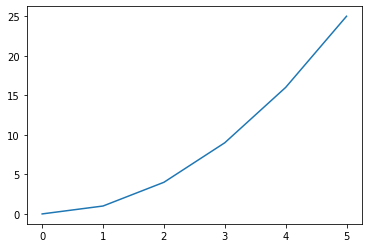

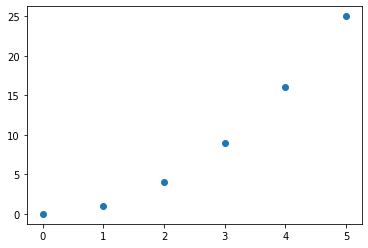

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
# ^-- эта "магия" говорит, что далее все графики будут рисоваться прямо в тетрадке, а не в отдельном окне.

# рисуем график
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])

plt.show()

# рисуем точки
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25])


Text(0, 0.5, '# Layers in state of the art image classifier')

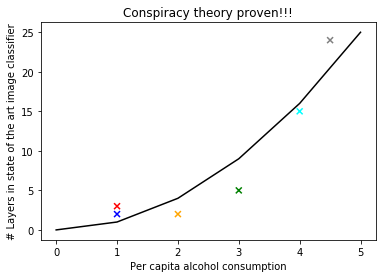

In [28]:
# рисуем точки с указанием маркеров и цветов
plt.scatter([1, 1, 2, 3, 4, 4.5], [3, 2, 2, 5, 15, 24],
            c=["red", "blue", "orange", "green", "cyan", "gray"], marker="x")

# без .show(), несколько графиков будут нарисованы один поверх другого
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c="black")

# Больше красоты
plt.title("Conspiracy theory proven!!!")
plt.xlabel("Per capita alcohol consumption")
plt.ylabel("# Layers in state of the art image classifier")

# больше забавных совпадений: http://bit.ly/1FcNnWF

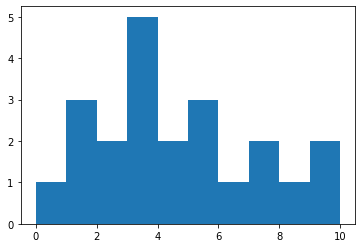

(array([4., 7., 5., 3., 3.]),
 array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 5 Patch objects>)

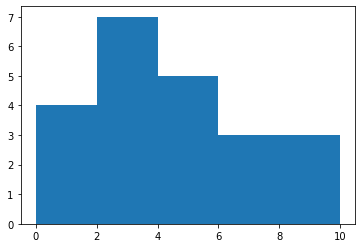

In [29]:
# Гистограмма - показываем плотность данных
plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8, 9, 10])
plt.show()

plt.hist([0, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4,
          4, 5, 5, 5, 6, 7, 7, 8, 9, 10], bins=5)

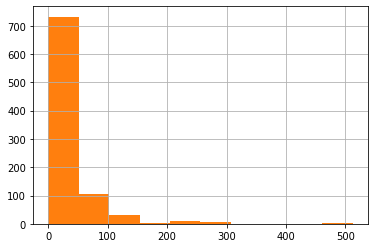

In [51]:
# Нарисуйте гистограмму возраста и гистограмму стоимости билетов на отдельных графиках

data.Age.hist()
data.Fare.hist()

# Бонус: используйте tab и shift-tab чтобы научиться рисовать 2D гистограмму возраста и цены билета.

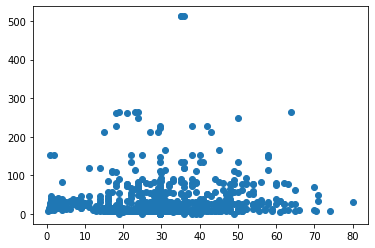

In [52]:
# Нарисуйте точки: вертикальная ось - стоимость билета, горизонтальная ось - возраст пассажира

plt.scatter(data.Age, data.Fare)
plt.show()

# кто сможет нарисовать точки мужчин и женщин разными цветами тот молодец

Ещё про matplotlib и визуализацию:
* Extended [tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)
* A [cheat sheet](http://bit.ly/2koHxNF)
* Other libraries for more sophisticated stuff: [Plotly](https://plot.ly/python/) and [Bokeh](https://bokeh.pydata.org/en/latest/)

### Пробуем предсказать результат сами

Найдите такой набор из не болеее чем 3 правил вида: `A >= b`, где A это признак и b это какое-то число (можно делать неравенство в обратную сторону), которые при пересечении позволяют выбрать минимум 10 пассажиров (для которых все правила верны), минимум 70% из которых выжили.

Подсказка: не все признаки числовые, но можно их как-то преобразовать...

P.S. Чтобы понять, какие признаки важны, можно попробовать составить график зависимости между признаком и выживаемостью.

In [ ]:
<YOUR CODE>

### Машинное обучение с помощью scikit-learn

<img src='https://imgs.xkcd.com/comics/machine_learning.png' width=320px>

Попробуйте предсказать результат, используя линейную регрессию из Scikit-learn и сравните качество предсказание с собственным вариантом на "ифах". Сможете ли вы предсказать лучше, не используя линейную регрессию?

__Подсказка:__ для строковых признаков, таких как "Sex" или "Embarked" вам придётся сделать какое-нибудь численное представление.
К примеру, 1 если пассажир мужского пола и 0 иначе 


In [ ]:
<YOUR CODE>